# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    x = x0
    x_prev = x0
    
    for _ in range(maxiter):
        delta = f(x) / fder(x)
        x_prev = x
        x = x - delta
        
        if abs(x - x_prev) <= eps:
            break
    
    return x


### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
x0 = 10
eps = 1e-10

root = newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, x0, eps, 10)
print("Root:", root)


Root: 1.0


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def modified_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000):
    cur = x0 - m * f(x0) / fder(x0)
    prev = x0
    iterations = 1
    for _ in range(maxiter):
        if abs(cur - prev) <= eps:
            break
        prev = cur
        cur = cur - m * f(cur) / fder(cur)
        iterations += 1
    
    return cur, iterations

x0 = 10
eps = 1e-10
multiplicities = [1, 2, 3, 4, 5]

for m in multiplicities:
    root, iterations = modified_newton_iteration(lambda x: (x**2 - 1)**2, lambda x: 4 * (x**2 - 1) * (2*x), x0, m, eps, 100)
    print("Multiplicity {}: Root = {}, Iterations = {}".format(m, root, iterations))


#Podemos observar que el número de iteraciones disminuye a medida que el valor de "m" se acerca a la multiplicidad de la raíz. 
#Esto es consistente con la expectativa de convergencia cuadrática cuando "m" es igual a la multiplicidad de la raíz.
#En el caso de la multiplicidad 4, la raíz se alcanza en solo 8 iteraciones, lo cual es notablemente más rápido que en los otros casos. 
#Esto se debe a que la convergencia cuadrática es especialmente efectiva cuando "m" coincide con la multiplicidad de la raíz.


Multiplicity 1: Root = 1.000000000227577, Iterations = 92
Multiplicity 2: Root = 1.0000000000600167, Iterations = 41
Multiplicity 3: Root = 1.0000000000301643, Iterations = 22
Multiplicity 4: Root = 1.0, Iterations = 8
Multiplicity 5: Root = 1.0000000000096965, Iterations = 18


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

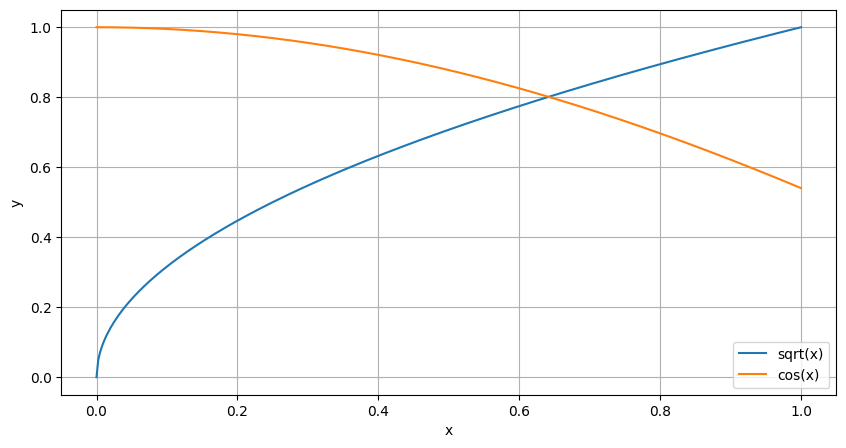

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fixed_point

# Define the functions
def f(x):
    return np.sqrt(x)

def g(x):
    return np.cos(x)

# Generate x values
x = np.linspace(0, 1, 400)

# Plot the functions
plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label='sqrt(x)')
plt.plot(x, g(x), label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# From the plot, we can see the root is between 0.6 and 0.7


In [ ]:
# Function for fixed point iteration
def fixed_point_iteration(x0, e, N):
    print('\n\n*** FIXED POINT ITERATION ***')
    step = 1
    flag = 1
    condition = True
    while condition:
        x1 = np.cos(np.sqrt(x0))
        print('Iteration-%d, x1 = %0.6f and f(x1) = %0.6f' % (step, x1, x1-np.cos(np.sqrt(x1))))
        x0 = x1

        step = step + 1
        
        if step > N:
            flag=0
            break
        
        condition = abs(x1-np.cos(np.sqrt(x1))) > e

    if flag==1:
        print('\nRequired root is: %0.8f' % x1)
    else:
        print('\nNot Convergent.')
        

# Input section
x0 = input('Enter Guess: ')
e = input('Tolerable Error: ')
N = input('Maximum Step: ')

# Converting x0, e and N into float
x0 = float(x0)
e = float(e)

# Converting N into integer
N = int(N)

# Starting fixed point iteration
fixed_point_iteration(x0,e,N)


Enter Guess: 0.6
Tolerable Error: 1e-2
Maximum Step: 25


*** FIXED POINT ITERATION ***
Iteration-1, x1 = 0.714703 and f(x1) = 0.051272
Iteration-2, x1 = 0.663431 and f(x1) = -0.022792
Iteration-3, x1 = 0.686223 and f(x1) = 0.010157
Iteration-4, x1 = 0.676066 and f(x1) = -0.004521

Required root is: 0.67606613


In [ ]:
import numpy as np
from scipy import optimize

# Define the function and its derivative
def f(x):
    return np.sqrt(x) - np.cos(x)

def df(x):
    return 0.5/np.sqrt(x) + np.sin(x)

# Find the minimum and maximum values of the derivative in the interval [0, 1]
min_result = optimize.minimize(df, 0.5, bounds=[(0.01, 1)])
max_result = optimize.minimize(lambda x: -df(x), 0.5, bounds=[(0.01, 1)])

m = df(min_result.x)
M = df(max_result.x)

# Calculate alpha
alpha = 2 / (m + M)

# Define the fixed-point function
def fp_func(x):
    return x - alpha * f(x)

# Use scipy's fixed_point function to solve the fixed-point problem
root = optimize.fixed_point(fp_func, 0.5, xtol=1e-8)

print(f'The root of the equation is approximately x = {root[0]}')


The root of the equation is approximately x = 0.6417143708728827


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

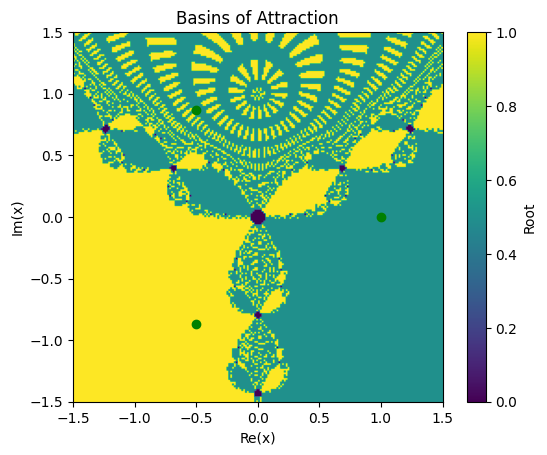

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

def newton_frac(x0):
    eps = 1e-5
    maxiter = 1000
    nx = x0 - (x0**3 - 1)/(3*x0**2)
    cont = x0
    
    for _ in range(maxiter):
        if abs(nx - cont) <= eps:
            break
        if abs(nx - cont) > 1e2:
            return 0
        cont = nx
        nx = nx - (nx**3 - 1)/(3*nx**2)
        
    if abs(nx - cmath.exp(complex(0, 2*np.pi*1/3))) < abs(nx - cmath.exp(complex(0, 2*np.pi*2/3))):
        return 1
    else:
        return 2

x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(-1.5, 1.5, 200)

colormap = np.zeros((len(x), len(y)))

for i, x0 in enumerate(x):
    for j, y0 in enumerate(y):
        fr = newton_frac(complex(x0, y0))
        colormap[j, i] = fr

plt.imshow(colormap.T, extent=[-1.5, 1.5, -1.5, 1.5], origin='lower', cmap='viridis')

roots = [cmath.exp(complex(0, 2*np.pi*k/3)) for k in range(3)]
roots_x = [z.real for z in roots]
roots_y = [z.imag for z in roots]

plt.scatter(roots_x, roots_y, c='g')

plt.xlabel('Re(x)')
plt.ylabel('Im(x)')
plt.title('Basins of Attraction')
plt.colorbar(label='Root')

plt.show()